In [1]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [2]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_vaild, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=2045)

(40000, 32, 32, 3) (40000, 10)
(10000, 32, 32, 3) (10000, 10)


In [9]:
print(X_train.shape, y_train.shape)
print(X_vaild.shape, y_valid.shape)

(40000, 32, 32, 3) (40000, 10)
(10000, 32, 32, 3) (10000, 10)


In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, 
                                   fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, y_train, batch_size=1024)
valid_generator = valid_datagen.flow(X_vaild, y_valid, batch_size=1024)

In [13]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(125, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 125)         72125     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 125)         0         
_________________________________________________________________
flatten (Flatten)            (None, 500)              

In [15]:
%%time
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
Hist = model.fit(train_generator, steps_per_epoch= len(X_train)/1024,
                 epochs=100, 
                 validation_data=valid_generator, validation_steps=len(X_vaild)/1024)

Epoch 1/100
39/39 [==============================] - 27s 677ms/step - loss: 2.1936 - accuracy: 0.1951 - val_loss: 1.9812 - val_accuracy: 0.2464
Epoch 2/100
39/39 [==============================] - 26s 662ms/step - loss: 1.9756 - accuracy: 0.2598 - val_loss: 1.9267 - val_accuracy: 0.2861
Epoch 3/100
39/39 [==============================] - 26s 664ms/step - loss: 1.9104 - accuracy: 0.2896 - val_loss: 1.7894 - val_accuracy: 0.3398
Epoch 4/100
39/39 [==============================] - 26s 662ms/step - loss: 1.8435 - accuracy: 0.3137 - val_loss: 1.7728 - val_accuracy: 0.3450
Epoch 5/100
39/39 [==============================] - 26s 661ms/step - loss: 1.8121 - accuracy: 0.3308 - val_loss: 1.6663 - val_accuracy: 0.3847
Epoch 6/100
39/39 [==============================] - 26s 664ms/step - loss: 1.7850 - accuracy: 0.3446 - val_loss: 1.6293 - val_accuracy: 0.3986
Epoch 7/100
39/39 [==============================] - 26s 662ms/step - loss: 1.7336 - accuracy: 0.3628 - val_loss: 1.6351 - val_accuracy:

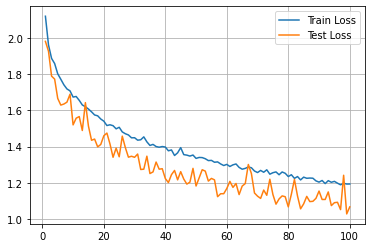

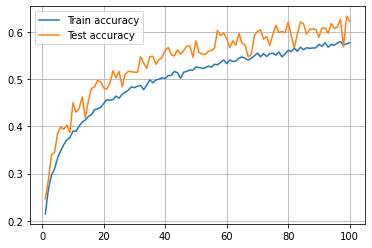

In [17]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss'])+1)

plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.legend(['Train Loss', 'Test Loss'])
plt.grid()
plt.show()

plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.legend(['Train accuracy', 'Test accuracy'])
plt.grid()
plt.show()

In [16]:
test_datagen = ImageDataGenerator(rescale= 1./255)

test_generator = test_datagen.flow(X_test, y_test, batch_size=1025)

loss, accuracy = model.evaluate(test_generator, steps=len(X_test)/1025)
loss, accuracy

9/9 [==============================] - 1s 68ms/step - loss: 1.0885 - accuracy: 0.6214


(1.0884952545166016, 0.621399998664856)

# batch_size 줄여

In [19]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, 
                                   fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator1 = train_datagen.flow(X_train, y_train, batch_size=128)
valid_generator1 = valid_datagen.flow(X_vaild, y_valid, batch_size=128)

In [ ]:
%%time
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
Hist1 = model.fit(train_generator1, steps_per_epoch= len(X_train)/128,
                 epochs=100, 
                 validation_data=valid_generator1, validation_steps=len(X_vaild)/128)

Epoch 1/100
312/312 [==============================] - 30s 95ms/step - loss: 1.3123 - accuracy: 0.5316 - val_loss: 1.1537 - val_accuracy: 0.5899
Epoch 2/100
312/312 [==============================] - 30s 95ms/step - loss: 1.2671 - accuracy: 0.5477 - val_loss: 1.1771 - val_accuracy: 0.5822
Epoch 3/100
312/312 [==============================] - 29s 94ms/step - loss: 1.2657 - accuracy: 0.5508 - val_loss: 1.1480 - val_accuracy: 0.5935
Epoch 4/100
312/312 [==============================] - 30s 94ms/step - loss: 1.2659 - accuracy: 0.5471 - val_loss: 1.1285 - val_accuracy: 0.5964
Epoch 5/100
312/312 [==============================] - 30s 95ms/step - loss: 1.2526 - accuracy: 0.5575 - val_loss: 1.1155 - val_accuracy: 0.6038
Epoch 6/100
 84/312 [=======>......................] - ETA: 21s - loss: 1.2172 - accuracy: 0.5659

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist1.history['loss'])+1)

plt.plot(epochs, Hist1.history['loss'])
plt.plot(epochs, Hist1.history['val_loss'])
plt.legend(['Train Loss', 'Test Loss'])
plt.grid()
plt.show()

plt.plot(epochs, Hist1.history['accuracy'])
plt.plot(epochs, Hist1.history['val_accuracy'])
plt.legend(['Train accuracy', 'Test accuracy'])
plt.grid()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

test_generator1 = test_datagen.flow(X_test, y_test, batch_size=128)

loss1, accuracy1 = model.evaluate(test_generator1, steps=len(X_test)/128)
loss1, accuracy1